In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.lines as mlines
import matplotlib.ticker as mticker
import matplotlib.lines as mlines

In [2]:


def extract_metrics(content):

    patterns = {
        "Only_KNAPSACK_efficiency": r"Only KNAPSACK\s+efficiency:\s+([\d.]+)",
        "Final_Knapsack_time": r"Final Knapsack time:\s+([\d.]+)",
        "Only_SFC_efficiency": r"Only SFC\s+efficiency:\s+([\d.]+)",
        "Final_SFC_time": r"Final SFC time:\s+([\d.]+)",
        "SFC_painterPartition_efficiency": r"SFC\+painterPartition\s+efficiency:\s+([\d.]+)",
        "Final_SFC_Painter_time": r"Final SFC\+Painter time:\s+([\d.]+)",
        "SFC_Knapsack_combined_efficiency": r"SFC\+Knapsack combined efficiency:\s+([\d.]+)",
        "Final_SFC_Knapsack_Combined_time": r"Final SFC\+Knapsack_Combined time:\s+([\d.]+)",
    }

    run_sections = re.split(r"=== Starting Run \d+ ===", content)[1:]  
    data = []

    for run_id, section in enumerate(run_sections, start=1):
        row = {"Run": run_id}
        for key, pattern in patterns.items():
            match = re.search(pattern, section)
            if match:
                row[key] = float(match.group(1))
            else:
                row[key] = None  
        data.append(row)
    
    return data


def consolidate_data_from_files(file_list):
    all_data = []
    
    for file_path in file_list:
        with open(file_path, 'r') as file:
            content = file.read()
        
        file_data = extract_metrics(content)
        for row in file_data:
            row["File"] = file_path
        all_data.extend(file_data)
    
    return pd.DataFrame(all_data)

file_paths = ['./output/2_4_output_worst.txt', './output/2_8_output_worst.txt', './output/2_16_output_worst.txt',
              './output/4_4_output_worst.txt', './output/4_8_output_worst.txt', './output/4_16_output_worst.txt',
              './output/8_4_output_worst.txt', './output/8_8_output_worst.txt', './output/8_16_output_worst.txt',
              './output/16_4_output_worst.txt', './output/16_8_output_worst.txt', './output/16_16_output_worst.txt',
              './output/32_4_output_worst.txt', './output/32_8_output_worst.txt', './output/32_16_output_worst.txt',
              './output/64_4_output_worst.txt', './output/64_8_output_worst.txt', './output/64_16_output_worst.txt',
              './output/128_4_output_worst.txt', './output/128_8_output_worst.txt', './output/128_16_output_worst.txt']




result_df = consolidate_data_from_files(file_paths)




In [4]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.995680,0.001405,0.959365,0.001250,0.959365,0.000184,0.819361,0.001288,./output/2_4_output_worst.txt
1,2,0.996604,0.001071,0.898462,0.001158,0.898462,0.000160,0.714687,0.001263,./output/2_4_output_worst.txt
2,3,0.973343,0.001077,0.988804,0.001169,0.988804,0.000161,0.824237,0.001255,./output/2_4_output_worst.txt
3,4,0.988802,0.001035,0.806495,0.001043,0.965015,0.000150,0.597364,0.001232,./output/2_4_output_worst.txt
4,5,0.955011,0.001094,0.927941,0.001220,0.927941,0.000154,0.746385,0.001239,./output/2_4_output_worst.txt
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.973010,0.045581,0.779559,0.028988,0.882258,0.000443,0.565884,0.061370,./output/128_16_output_worst.txt
5246,247,0.975171,0.045417,0.809862,0.025125,0.888066,0.000449,0.547185,0.046619,./output/128_16_output_worst.txt
5247,248,0.973983,0.050250,0.796759,0.025225,0.879644,0.000507,0.567040,0.047812,./output/128_16_output_worst.txt
5248,249,0.970334,0.048836,0.791961,0.024286,0.887818,0.000458,0.584413,0.100882,./output/128_16_output_worst.txt


In [5]:
result_df.head(250)

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.995680,0.001405,0.959365,0.001250,0.959365,0.000184,0.819361,0.001288,./output/2_4_output_worst.txt
1,2,0.996604,0.001071,0.898462,0.001158,0.898462,0.000160,0.714687,0.001263,./output/2_4_output_worst.txt
2,3,0.973343,0.001077,0.988804,0.001169,0.988804,0.000161,0.824237,0.001255,./output/2_4_output_worst.txt
3,4,0.988802,0.001035,0.806495,0.001043,0.965015,0.000150,0.597364,0.001232,./output/2_4_output_worst.txt
4,5,0.955011,0.001094,0.927941,0.001220,0.927941,0.000154,0.746385,0.001239,./output/2_4_output_worst.txt
...,...,...,...,...,...,...,...,...,...,...
245,246,0.982179,0.001091,0.912901,0.001177,0.912901,0.000162,0.747666,0.001254,./output/2_4_output_worst.txt
246,247,0.994144,0.001063,0.893809,0.001133,0.893809,0.000181,0.692846,0.001257,./output/2_4_output_worst.txt
247,248,0.997689,0.001070,0.859367,0.001118,0.923080,0.000182,0.579533,0.001363,./output/2_4_output_worst.txt
248,249,0.985568,0.001077,0.802604,0.001067,0.943253,0.000167,0.647089,0.001275,./output/2_4_output_worst.txt


In [6]:
result_df['File'] = result_df['File'].apply(lambda x: os.path.splitext(os.path.basename(x))[0])

In [7]:
result_df['File'] = result_df['File'].apply(lambda x: '_'.join([word.capitalize() for word in x.split('_')]))

In [8]:
result_df

,Run,Only_KNAPSACK_efficiency,Final_Knapsack_time,Only_SFC_efficiency,Final_SFC_time,SFC_painterPartition_efficiency,Final_SFC_Painter_time,SFC_Knapsack_combined_efficiency,Final_SFC_Knapsack_Combined_time,File
0,1,0.995680,0.001405,0.959365,0.001250,0.959365,0.000184,0.819361,0.001288,2_4_Output_Worst
1,2,0.996604,0.001071,0.898462,0.001158,0.898462,0.000160,0.714687,0.001263,2_4_Output_Worst
2,3,0.973343,0.001077,0.988804,0.001169,0.988804,0.000161,0.824237,0.001255,2_4_Output_Worst
3,4,0.988802,0.001035,0.806495,0.001043,0.965015,0.000150,0.597364,0.001232,2_4_Output_Worst
4,5,0.955011,0.001094,0.927941,0.001220,0.927941,0.000154,0.746385,0.001239,2_4_Output_Worst
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.973010,0.045581,0.779559,0.028988,0.882258,0.000443,0.565884,0.061370,128_16_Output_Worst
5246,247,0.975171,0.045417,0.809862,0.025125,0.888066,0.000449,0.547185,0.046619,128_16_Output_Worst
5247,248,0.973983,0.050250,0.796759,0.025225,0.879644,0.000507,0.567040,0.047812,128_16_Output_Worst
5248,249,0.970334,0.048836,0.791961,0.024286,0.887818,0.000458,0.584413,0.100882,128_16_Output_Worst


In [9]:
result_df = result_df.rename(columns={'Only_KNAPSACK_efficiency': 'Only_Knapsack_Efficiency', 'Final_Knapsack_time': 'Only_Knapsack_Final_Time', 'Only_SFC_efficiency':'Only_SFC_Efficiency','Final_SFC_time': 'Only_SFC_Final_Time','SFC_painterPartition_efficiency': 'SFC_PainterPartition_Efficiency','Final_SFC_Painter_time': 'SFC_PainterPartition_Final_Time','SFC_Knapsack_combined_efficiency':'SFC_Knapsack_Combined_Efficiency','Final_SFC_Knapsack_Combined_time':'SFC_Knapsack_Combined_Final_Time'} )

In [10]:
result_df

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.995680,0.001405,0.959365,0.001250,0.959365,0.000184,0.819361,0.001288,2_4_Output_Worst
1,2,0.996604,0.001071,0.898462,0.001158,0.898462,0.000160,0.714687,0.001263,2_4_Output_Worst
2,3,0.973343,0.001077,0.988804,0.001169,0.988804,0.000161,0.824237,0.001255,2_4_Output_Worst
3,4,0.988802,0.001035,0.806495,0.001043,0.965015,0.000150,0.597364,0.001232,2_4_Output_Worst
4,5,0.955011,0.001094,0.927941,0.001220,0.927941,0.000154,0.746385,0.001239,2_4_Output_Worst
...,...,...,...,...,...,...,...,...,...,...
5245,246,0.973010,0.045581,0.779559,0.028988,0.882258,0.000443,0.565884,0.061370,128_16_Output_Worst
5246,247,0.975171,0.045417,0.809862,0.025125,0.888066,0.000449,0.547185,0.046619,128_16_Output_Worst
5247,248,0.973983,0.050250,0.796759,0.025225,0.879644,0.000507,0.567040,0.047812,128_16_Output_Worst
5248,249,0.970334,0.048836,0.791961,0.024286,0.887818,0.000458,0.584413,0.100882,128_16_Output_Worst


In [11]:
column_list = result_df['SFC_Knapsack_Combined_Efficiency'].tolist()

In [12]:
print(column_list)

[0.8193614052, 0.7146867589, 0.8242368787, 0.5973640237, 0.7463847414, 0.7034745372, 0.697705922, 0.642450316, 0.6671456853, 0.6416948759, 0.7353223579, 0.6738564622, 0.7598869227, 0.7155458804, 0.7194296332, 0.6422487, 0.6088604964, 0.6897256676, 0.7331050371, 0.5855125768, 0.7684665859, 0.7190767573, 0.8312768544, 0.7313627471, 0.6227168551, 0.8229666029, 0.7618546125, 0.7468769315, 0.7748280481, 0.6304495257, 0.6873144003, 0.6996868839, 0.6758694808, 0.6878221336, 0.6696444235, 0.672136649, 0.6247135338, 0.6052749205, 0.7218384303, 0.795828083, 0.6920729977, 0.8020155867, 0.7866953206, 0.6836604229, 0.6528425734, 0.6331183588, 0.6584286449, 0.7775769368, 0.8166183046, 0.627030377, 0.8278941429, 0.6490202634, 0.769357682, 0.7212074882, 0.7856199622, 0.739918191, 0.7902326778, 0.6902347314, 0.7400930838, 0.7940703476, 0.8225222727, 0.6462831055, 0.7625014512, 0.8218275754, 0.8740898799, 0.6654429397, 0.6479822087, 0.7112330842, 0.6757102901, 0.7938616975, 0.7267701203, 0.5864048519, 0

In [13]:
# output_file = "./result/data.xlsx"

# with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
#     for file_name, group in result_df.groupby('File', sort=False):
#         sheet_name = file_name.split("/")[-1].replace(".txt", "")
#         group.to_excel(writer, sheet_name=sheet_name, index=False)


In [14]:
filename = '2_4_Output_Worst'
df_1 = result_df[result_df['File'] == filename]

In [15]:
df_1

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
0,1,0.995680,0.001405,0.959365,0.001250,0.959365,0.000184,0.819361,0.001288,2_4_Output_Worst
1,2,0.996604,0.001071,0.898462,0.001158,0.898462,0.000160,0.714687,0.001263,2_4_Output_Worst
2,3,0.973343,0.001077,0.988804,0.001169,0.988804,0.000161,0.824237,0.001255,2_4_Output_Worst
3,4,0.988802,0.001035,0.806495,0.001043,0.965015,0.000150,0.597364,0.001232,2_4_Output_Worst
4,5,0.955011,0.001094,0.927941,0.001220,0.927941,0.000154,0.746385,0.001239,2_4_Output_Worst
...,...,...,...,...,...,...,...,...,...,...
245,246,0.982179,0.001091,0.912901,0.001177,0.912901,0.000162,0.747666,0.001254,2_4_Output_Worst
246,247,0.994144,0.001063,0.893809,0.001133,0.893809,0.000181,0.692846,0.001257,2_4_Output_Worst
247,248,0.997689,0.001070,0.859367,0.001118,0.923080,0.000182,0.579533,0.001363,2_4_Output_Worst
248,249,0.985568,0.001077,0.802604,0.001067,0.943253,0.000167,0.647089,0.001275,2_4_Output_Worst


In [16]:
pd.set_option('display.max_columns', None)

In [17]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# file_order = result_df['File'].drop_duplicates().tolist()
# result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

# grouped = result_df.groupby('File', sort=False)

# for file_name, group in grouped:
#     group = group.sort_values('Run')

#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Efficiency Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Efficiency', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, eff_col, _ in algorithms:
#         ax.plot(group['Run'], group[eff_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     efficiency_filename = f'./result/all_run_data/{file_name}_efficiency.png'
#     plt.savefig(efficiency_filename, dpi=600)
#     plt.show()
#     fig, ax = plt.subplots(figsize=(20, 10))
#     ax.set_title(f'Time Variation over Runs for Output Test Case: {file_name}', fontsize=20)
#     ax.set_xlabel('Run', fontsize=20)
#     ax.set_ylabel('Time (seconds)', fontsize=20)
#     plt.xticks(fontsize=16)
#     plt.yticks(fontsize=16)

#     for alg_name, _, time_col in algorithms:
#         ax.plot(group['Run'], group[time_col], label=alg_name, marker='o', linestyle='-', linewidth=1, markersize=4)

#     ax.legend(title='Algorithms', title_fontsize=20, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
#     ax.grid(True)
#     plt.tight_layout()
#     time_filename = f'./result/all_run_data/{file_name}_time.png'
#     plt.savefig(time_filename, dpi=600)
#     plt.show()


In [18]:
file_order = result_df['File'].drop_duplicates().tolist()
result_df['File'] = pd.Categorical(result_df['File'], categories=file_order, ordered=True)

grouped = result_df.groupby('File', sort=False)


/tmp/ipykernel_844138/3567121358.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False)


In [19]:
specific_group = grouped.get_group('2_8_Output_Worst')
specific_group

,Run,Only_Knapsack_Efficiency,Only_Knapsack_Final_Time,Only_SFC_Efficiency,Only_SFC_Final_Time,SFC_PainterPartition_Efficiency,SFC_PainterPartition_Final_Time,SFC_Knapsack_Combined_Efficiency,SFC_Knapsack_Combined_Final_Time,File
250,1,0.997899,0.001109,0.963664,0.001111,0.963664,0.000177,0.916915,0.001290,2_8_Output_Worst
251,2,0.997846,0.001626,0.904821,0.001216,0.966732,0.000173,0.851598,0.001388,2_8_Output_Worst
252,3,0.995779,0.001139,0.913653,0.001241,0.973906,0.000183,0.895990,0.001332,2_8_Output_Worst
253,4,0.998974,0.001070,0.988598,0.001145,0.988598,0.000183,0.855196,0.001305,2_8_Output_Worst
254,5,0.991912,0.001168,0.906875,0.001164,0.969769,0.000168,0.844368,0.001422,2_8_Output_Worst
...,...,...,...,...,...,...,...,...,...,...
495,246,0.995069,0.001134,0.923308,0.001134,0.983780,0.000170,0.863272,0.001383,2_8_Output_Worst
496,247,0.996703,0.001357,0.884244,0.001400,0.998114,0.000164,0.788896,0.001329,2_8_Output_Worst
497,248,0.998776,0.001044,0.993556,0.001138,0.993556,0.000158,0.912618,0.001281,2_8_Output_Worst
498,249,0.995241,0.001338,0.924935,0.001142,0.957675,0.000167,0.834662,0.001346,2_8_Output_Worst


In [20]:
specific_group = specific_group['Only_Knapsack_Efficiency'].mean()
specific_group

np.float64(0.9939609727748)

In [21]:
efficiency_cols = [
    'Only_Knapsack_Efficiency',
    'SFC_PainterPartition_Efficiency',
    'Only_SFC_Efficiency',
    'SFC_Knapsack_Combined_Efficiency'
]

time_cols = [
    'Only_Knapsack_Final_Time',
    'SFC_PainterPartition_Final_Time',
    'Only_SFC_Final_Time',
    'SFC_Knapsack_Combined_Final_Time'
]

all_cols = efficiency_cols + time_cols

unique_files = result_df['File'].drop_duplicates()
result_df['File'] = pd.Categorical(result_df['File'], categories=unique_files, ordered=True)
agg_funcs = {col: ['mean', 'std', 'min', 'max'] for col in all_cols}
grouped = result_df.groupby('File', sort=False).agg(agg_funcs)
grouped.columns = ['_'.join(col).strip() for col in grouped.columns.values]
grouped = grouped.reset_index()
grouped['File'] = pd.Categorical(grouped['File'], categories=unique_files, ordered=True)
grouped = grouped.sort_values('File')

/tmp/ipykernel_844138/3674146322.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = result_df.groupby('File', sort=False).agg(agg_funcs)


In [22]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2_4_Output_Worst,0.985356,0.013305,0.918592,0.999878,0.944241,0.035726,0.850322,0.999691,0.895575,0.068078,0.751518,0.999164,0.706308,0.079210,0.512289,0.891981,0.001172,0.000209,0.001009,0.002510,0.000170,0.000083,0.000131,0.001395,0.001154,0.000154,0.000986,0.002178,0.001343,0.000313,0.001156,0.005282
1,2_8_Output_Worst,0.993961,0.006007,0.966353,0.999938,0.967878,0.019910,0.914773,0.999988,0.939158,0.035894,0.841656,0.999988,0.873026,0.044198,0.751628,0.981340,0.001313,0.001459,0.001029,0.023923,0.000176,0.000038,0.000145,0.000531,0.001200,0.000202,0.001018,0.002700,0.001456,0.000468,0.001173,0.006451
2,2_16_Output_Worst,0.997162,0.002871,0.980254,0.999979,0.984149,0.010803,0.950642,0.999985,0.967933,0.019825,0.919033,0.999293,0.921251,0.037031,0.835001,0.990955,0.001273,0.000631,0.001040,0.009884,0.000186,0.000060,0.000145,0.000794,0.001246,0.000306,0.001046,0.003783,0.001463,0.000686,0.001211,0.010148
3,4_4_Output_Worst,0.979252,0.012742,0.926739,0.998268,0.910214,0.029636,0.841394,0.975185,0.864729,0.048100,0.705063,0.967862,0.667151,0.057948,0.524775,0.845621,0.002044,0.000940,0.001588,0.009496,0.000181,0.000045,0.000144,0.000583,0.001661,0.000801,0.001331,0.010574,0.002191,0.000794,0.001765,0.012586
4,4_8_Output_Worst,0.990736,0.005819,0.970898,0.999140,0.951124,0.018439,0.896997,0.994904,0.920818,0.030259,0.852253,0.994904,0.847850,0.038521,0.725937,0.935036,0.001822,0.001149,0.001571,0.019627,0.000173,0.000040,0.000140,0.000580,0.001555,0.000612,0.001304,0.007836,0.002000,0.000619,0.001746,0.010938
5,4_16_Output_Worst,0.995809,0.002482,0.987458,0.999651,0.976340,0.009014,0.955682,0.997245,0.958065,0.016160,0.919969,0.997245,0.905001,0.027510,0.833680,0.961044,0.001800,0.000417,0.001580,0.007043,0.000187,0.000071,0.000154,0.001038,0.001475,0.000259,0.001296,0.003750,0.002092,0.001359,0.001778,0.022576
6,8_4_Output_Worst,0.989703,0.004520,0.971434,0.997724,0.944332,0.012630,0.909407,0.976841,0.914523,0.022198,0.857459,0.965023,0.832648,0.032172,0.706206,0.905189,0.003409,0.000864,0.002802,0.010808,0.000198,0.000073,0.000151,0.001223,0.002320,0.000627,0.001908,0.007642,0.003679,0.001077,0.002976,0.012529
7,8_8_Output_Worst,0.995328,0.002008,0.988915,0.999180,0.971262,0.006928,0.949469,0.987138,0.955506,0.012617,0.914469,0.985510,0.896187,0.020146,0.847948,0.944026,0.003222,0.001818,0.002613,0.031256,0.000207,0.000114,0.000163,0.001663,0.002204,0.000702,0.001751,0.010307,0.003406,0.001097,0.002872,0.017701
8,8_16_Output_Worst,0.997911,0.000840,0.995299,0.999497,0.985854,0.003339,0.977160,0.994354,0.976516,0.006697,0.953723,0.991848,0.945765,0.010603,0.914950,0.973144,0.003460,0.000483,0.002957,0.005820,0.000281,0.000082,0.000221,0.001274,0.002484,0.000777,0.002060,0.010455,0.003645,0.000601,0.003100,0.009820
9,16_4_Output_Worst,0.988797,0.003754,0.976774,0.997552,0.942094,0.009292,0.907501,0.968896,0.906831,0.020117,0.852326,0.949177,0.820756,0.027508,0.709683,0.878570,0.007104,0.013332,0.005297,0.216647,0.000214,0.0

In [23]:
grouped['File'] = grouped['File'].str.replace(r'(\d+)_(\d+)_Output_Worst', r'\1R_\2BPR', regex=True)

In [24]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.985356,0.013305,0.918592,0.999878,0.944241,0.035726,0.850322,0.999691,0.895575,0.068078,0.751518,0.999164,0.706308,0.079210,0.512289,0.891981,0.001172,0.000209,0.001009,0.002510,0.000170,0.000083,0.000131,0.001395,0.001154,0.000154,0.000986,0.002178,0.001343,0.000313,0.001156,0.005282
1,2R_8BPR,0.993961,0.006007,0.966353,0.999938,0.967878,0.019910,0.914773,0.999988,0.939158,0.035894,0.841656,0.999988,0.873026,0.044198,0.751628,0.981340,0.001313,0.001459,0.001029,0.023923,0.000176,0.000038,0.000145,0.000531,0.001200,0.000202,0.001018,0.002700,0.001456,0.000468,0.001173,0.006451
2,2R_16BPR,0.997162,0.002871,0.980254,0.999979,0.984149,0.010803,0.950642,0.999985,0.967933,0.019825,0.919033,0.999293,0.921251,0.037031,0.835001,0.990955,0.001273,0.000631,0.001040,0.009884,0.000186,0.000060,0.000145,0.000794,0.001246,0.000306,0.001046,0.003783,0.001463,0.000686,0.001211,0.010148
3,4R_4BPR,0.979252,0.012742,0.926739,0.998268,0.910214,0.029636,0.841394,0.975185,0.864729,0.048100,0.705063,0.967862,0.667151,0.057948,0.524775,0.845621,0.002044,0.000940,0.001588,0.009496,0.000181,0.000045,0.000144,0.000583,0.001661,0.000801,0.001331,0.010574,0.002191,0.000794,0.001765,0.012586
4,4R_8BPR,0.990736,0.005819,0.970898,0.999140,0.951124,0.018439,0.896997,0.994904,0.920818,0.030259,0.852253,0.994904,0.847850,0.038521,0.725937,0.935036,0.001822,0.001149,0.001571,0.019627,0.000173,0.000040,0.000140,0.000580,0.001555,0.000612,0.001304,0.007836,0.002000,0.000619,0.001746,0.010938
5,4R_16BPR,0.995809,0.002482,0.987458,0.999651,0.976340,0.009014,0.955682,0.997245,0.958065,0.016160,0.919969,0.997245,0.905001,0.027510,0.833680,0.961044,0.001800,0.000417,0.001580,0.007043,0.000187,0.000071,0.000154,0.001038,0.001475,0.000259,0.001296,0.003750,0.002092,0.001359,0.001778,0.022576
6,8R_4BPR,0.989703,0.004520,0.971434,0.997724,0.944332,0.012630,0.909407,0.976841,0.914523,0.022198,0.857459,0.965023,0.832648,0.032172,0.706206,0.905189,0.003409,0.000864,0.002802,0.010808,0.000198,0.000073,0.000151,0.001223,0.002320,0.000627,0.001908,0.007642,0.003679,0.001077,0.002976,0.012529
7,8R_8BPR,0.995328,0.002008,0.988915,0.999180,0.971262,0.006928,0.949469,0.987138,0.955506,0.012617,0.914469,0.985510,0.896187,0.020146,0.847948,0.944026,0.003222,0.001818,0.002613,0.031256,0.000207,0.000114,0.000163,0.001663,0.002204,0.000702,0.001751,0.010307,0.003406,0.001097,0.002872,0.017701
8,8R_16BPR,0.997911,0.000840,0.995299,0.999497,0.985854,0.003339,0.977160,0.994354,0.976516,0.006697,0.953723,0.991848,0.945765,0.010603,0.914950,0.973144,0.003460,0.000483,0.002957,0.005820,0.000281,0.000082,0.000221,0.001274,0.002484,0.000777,0.002060,0.010455,0.003645,0.000601,0.003100,0.009820
9,16R_4BPR,0.988797,0.003754,0.976774,0.997552,0.942094,0.009292,0.907501,0.968896,0.906831,0.020117,0.852326,0.949177,0.820756,0.027508,0.709683,0.878570,0.007104,0.013332,0.005297,0.216647,0.000214,0.000024,0.000175,0.000419,0.003656,0.000353,0.003213,0.005541,0.007324,0.013595,0.005535,0.2

In [25]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

# Error Bar Plot

Mean values for each algorithm and file as the central point.
Variability using error bars for standard deviations.

Use a bar or point plot for the mean and add error bars based on the standard deviation.
Place all algorithms side-by-side (grouped bars) or overlay them to compare their average performance and variability for each file.


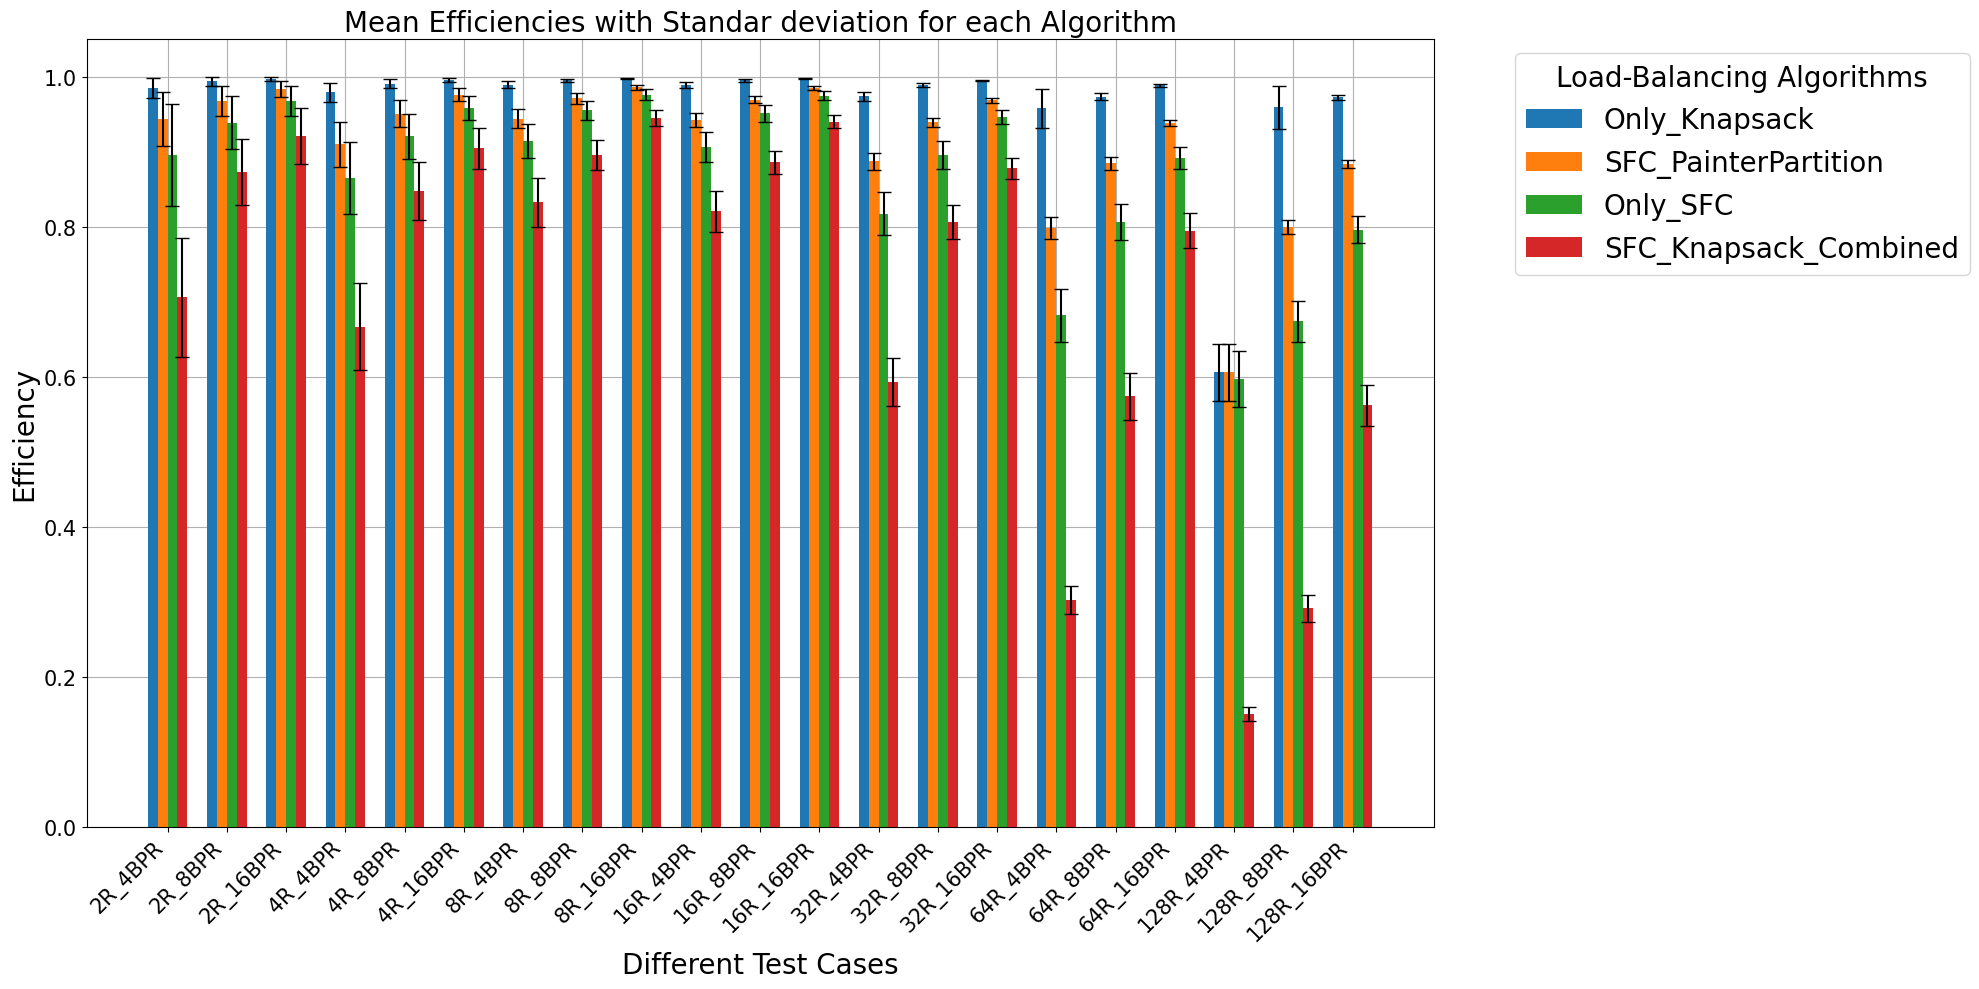

In [26]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(algorithms)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(algorithms):
    mean_col = f'{alg}_Efficiency_mean'
    std_col = f'{alg}_Efficiency_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
    
ax.grid(True)
ax.set_axisbelow(True)
ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Efficiency', fontsize=20)
ax.set_title('Mean Efficiencies with Standar deviation for each Algorithm', fontsize=20)
ax.set_xticks(x + width * (num_algorithms - 1) / 2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

plt.margins(x=0.05)
plt.tight_layout()
plt.savefig('./result/result_worst/efficiency_errorbarplot.png', dpi=600)
plt.show()

In [ ]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

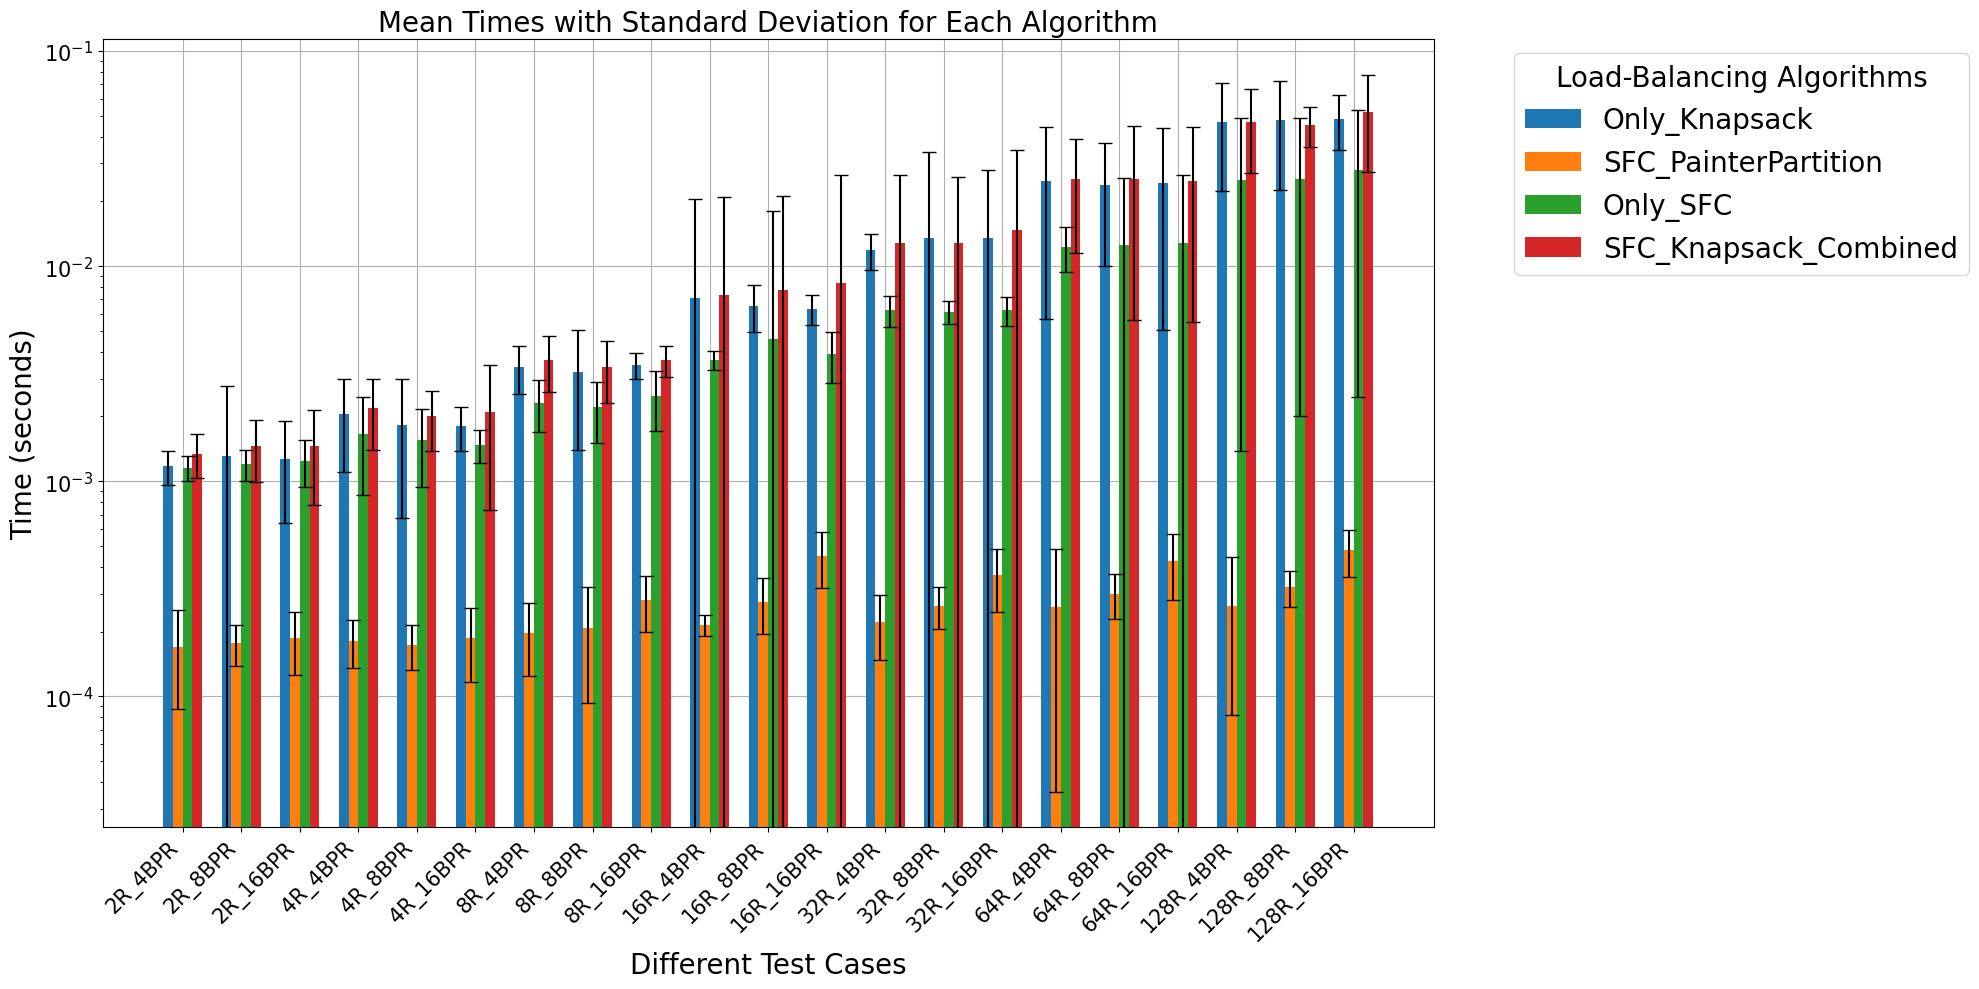

In [27]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
fig, ax = plt.subplots(figsize=(20, 10))
width = 1  
num_algorithms = len(time)
group_gap = 2  
x_spacing = num_algorithms * width + group_gap
x = np.arange(len(grouped['File'])) * x_spacing

for i, alg in enumerate(time):
    mean_col = f'{alg}_Final_Time_mean'
    std_col = f'{alg}_Final_Time_std'
    ax.bar(x + i * width, grouped[mean_col], width,
           yerr=grouped[std_col], capsize=5, label=alg)
ax.grid(True)
ax.set_axisbelow(True)
# Set y-axis to logarithmic scale
ax.set_yscale('log')

ax.set_xlabel('Different Test Cases', fontsize=20)
ax.set_ylabel('Time (seconds)', fontsize=20)
ax.set_title('Mean Times with Standard Deviation for Each Algorithm', fontsize=20)
ax.set_xticks(x + width*(len(time)-1)/2)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.tick_params(axis='both', which='major', labelsize=15)
ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
plt.margins(x=0.05)
plt.tight_layout()
plt.savefig('./result/result_worst/time_errorbarplot.png', dpi=600)
plt.show()

In [28]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']

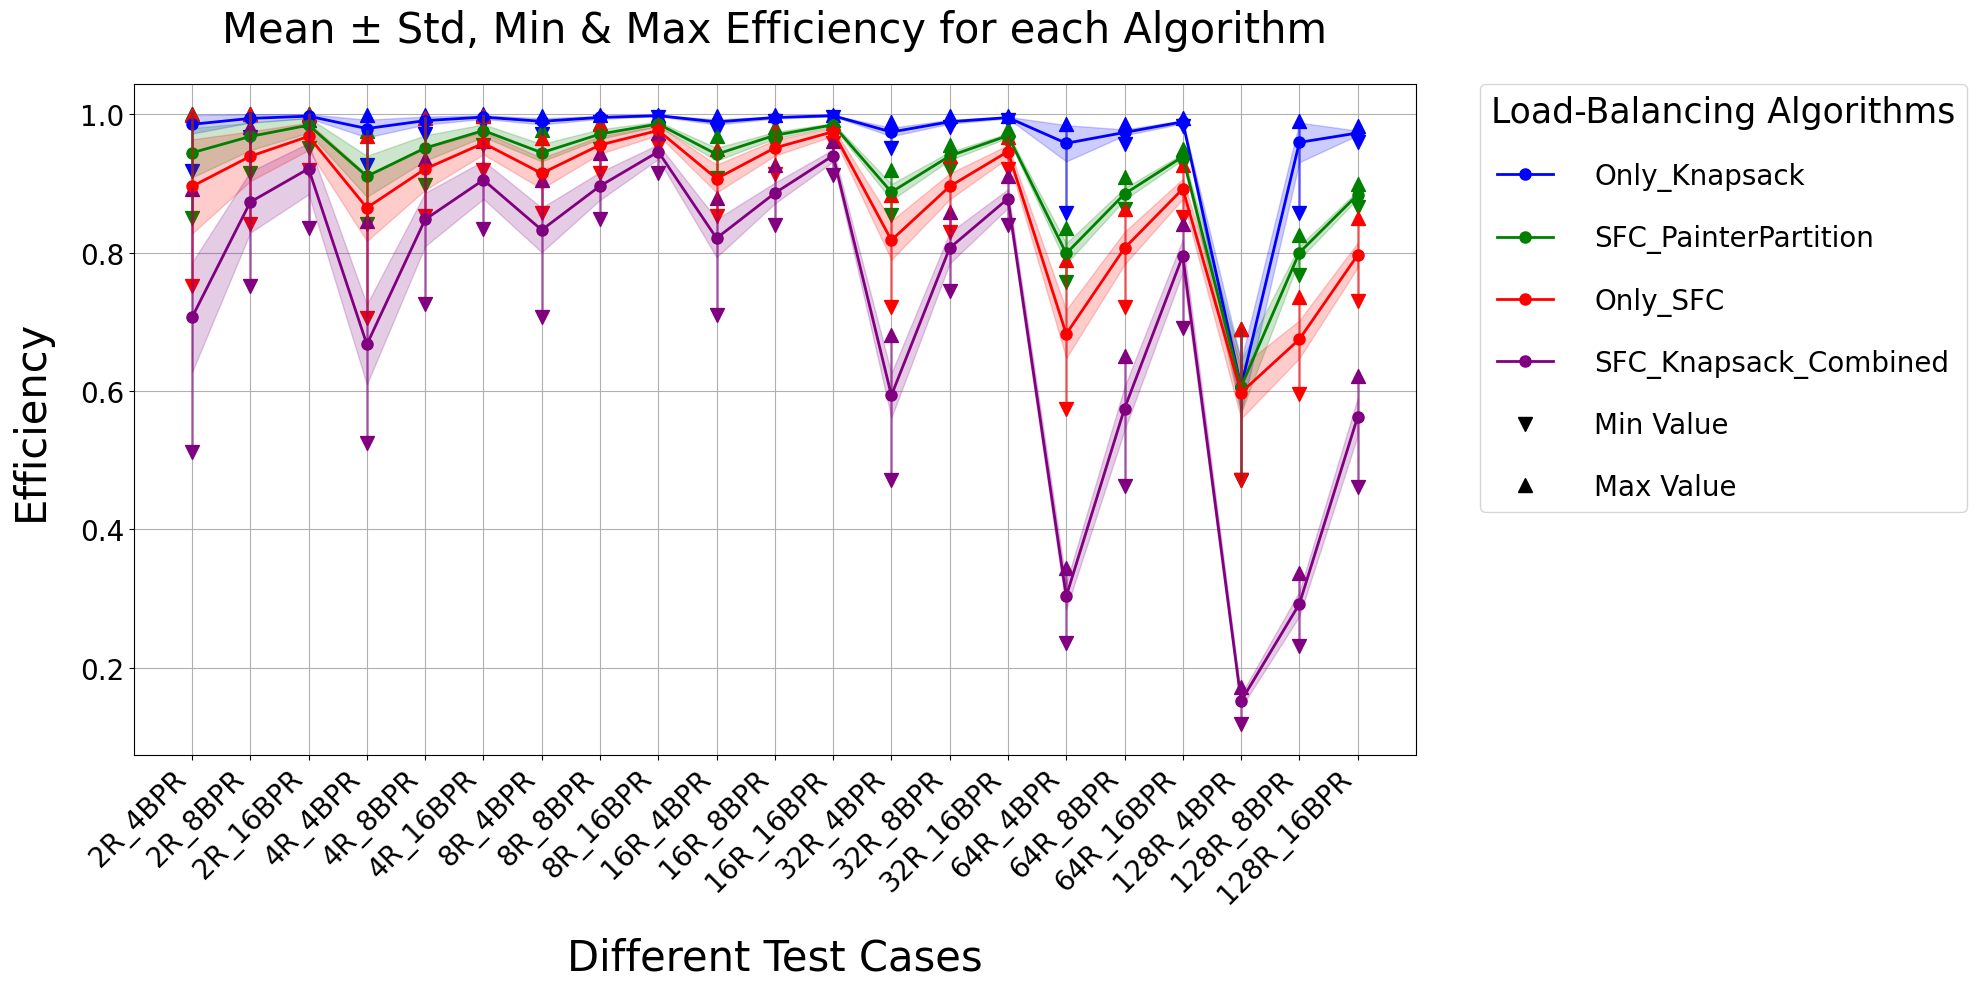

In [29]:


algorithms = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/result_worst/efficiency_all_stats.png', dpi=600)
plt.show()





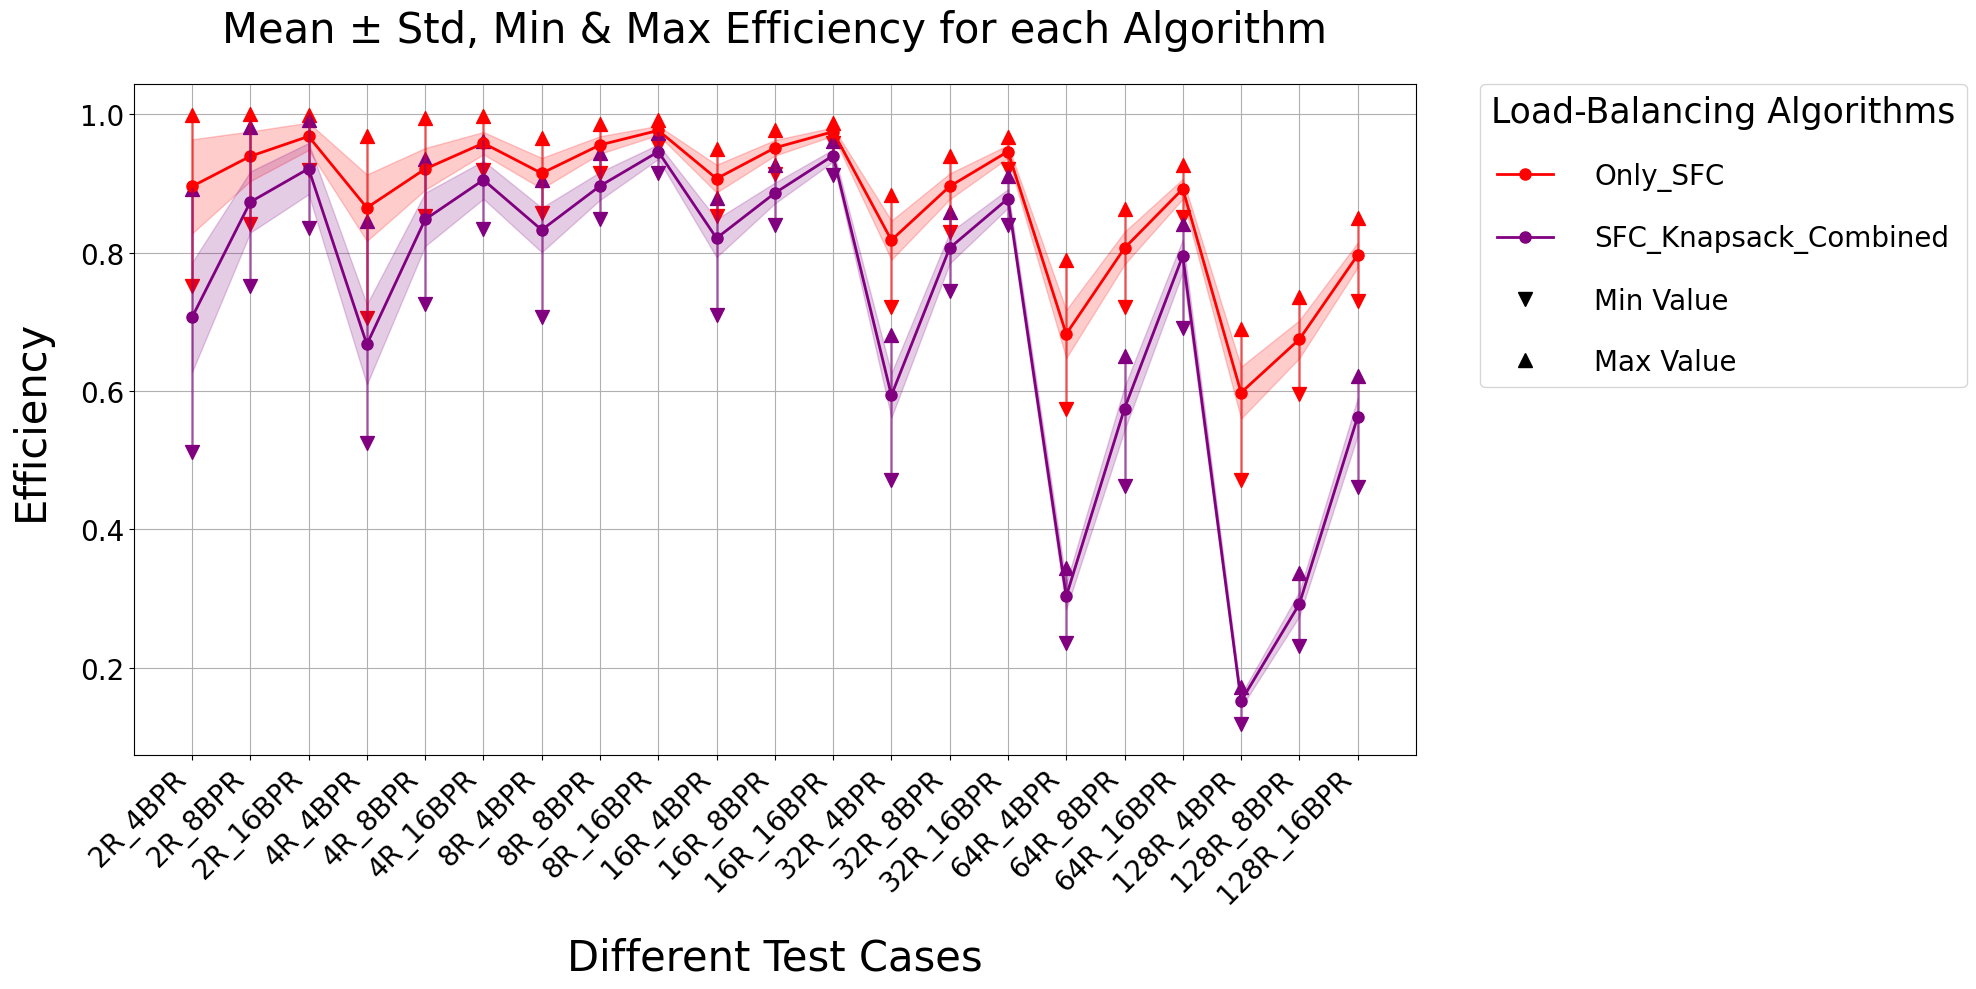

In [30]:


algorithms = ['Only_SFC', 'SFC_Knapsack_Combined']
colors = ['red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  


    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases',  fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

import matplotlib.lines as mlines
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/result_worst/efficiency_all_stats_2.png', dpi=600)
plt.show()



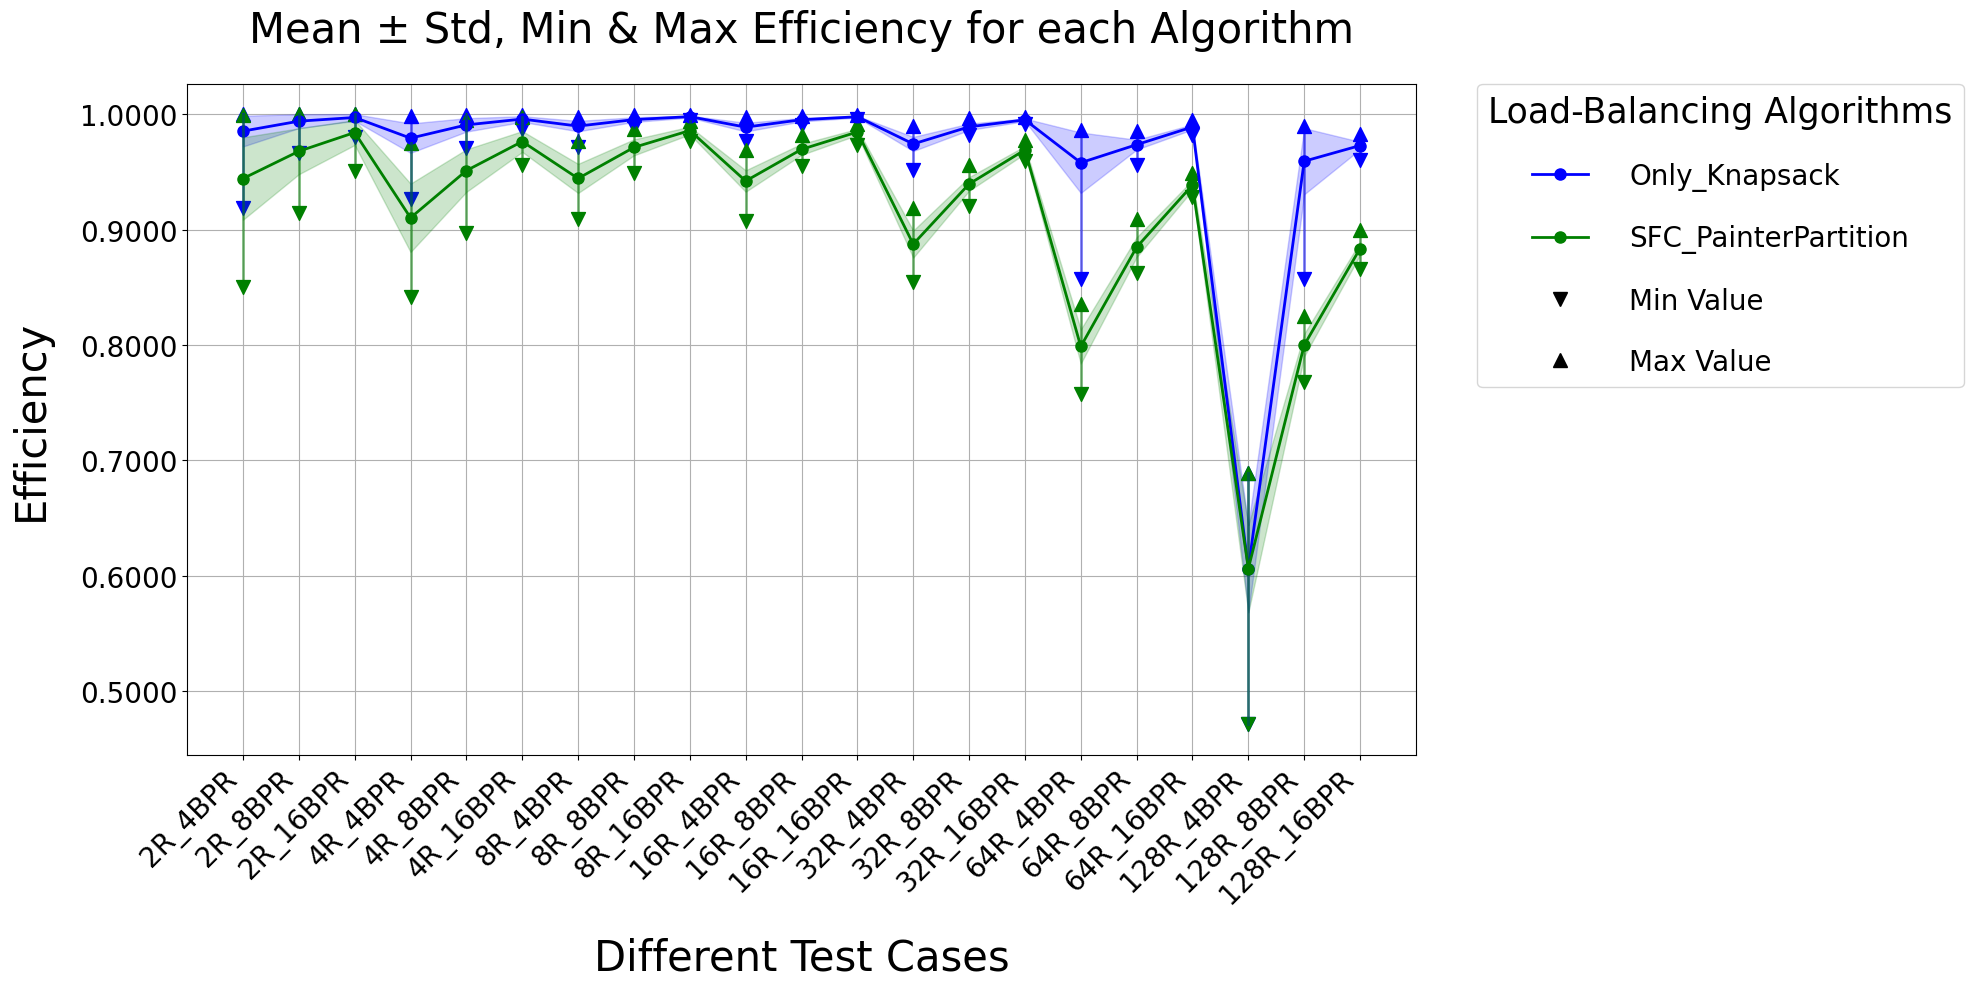

In [31]:
algorithms = ['Only_Knapsack', 'SFC_PainterPartition']
colors = ['blue', 'green']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(algorithms):
    alg_name = alg  

    mean_col = f'{alg_name}_Efficiency_mean'
    std_col = f'{alg_name}_Efficiency_std'
    min_col = f'{alg_name}_Efficiency_min'
    max_col = f'{alg_name}_Efficiency_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    ax.fill_between(
        x,
        grouped[mean_col] - grouped[std_col],
        grouped[mean_col] + grouped[std_col],
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Efficiency for each Algorithm', pad=30, fontsize=30)
# ax.set_ylim(0.990, 1.0005)

ax.tick_params(axis='both', which='major', labelsize=20)

ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%.4f'))
min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')
handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/result_worst/efficiency_all_stats_3.png', dpi=600)
plt.show()


In [32]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.985356,0.013305,0.918592,0.999878,0.944241,0.035726,0.850322,0.999691,0.895575,0.068078,0.751518,0.999164,0.706308,0.079210,0.512289,0.891981,0.001172,0.000209,0.001009,0.002510,0.000170,0.000083,0.000131,0.001395,0.001154,0.000154,0.000986,0.002178,0.001343,0.000313,0.001156,0.005282
1,2R_8BPR,0.993961,0.006007,0.966353,0.999938,0.967878,0.019910,0.914773,0.999988,0.939158,0.035894,0.841656,0.999988,0.873026,0.044198,0.751628,0.981340,0.001313,0.001459,0.001029,0.023923,0.000176,0.000038,0.000145,0.000531,0.001200,0.000202,0.001018,0.002700,0.001456,0.000468,0.001173,0.006451
2,2R_16BPR,0.997162,0.002871,0.980254,0.999979,0.984149,0.010803,0.950642,0.999985,0.967933,0.019825,0.919033,0.999293,0.921251,0.037031,0.835001,0.990955,0.001273,0.000631,0.001040,0.009884,0.000186,0.000060,0.000145,0.000794,0.001246,0.000306,0.001046,0.003783,0.001463,0.000686,0.001211,0.010148
3,4R_4BPR,0.979252,0.012742,0.926739,0.998268,0.910214,0.029636,0.841394,0.975185,0.864729,0.048100,0.705063,0.967862,0.667151,0.057948,0.524775,0.845621,0.002044,0.000940,0.001588,0.009496,0.000181,0.000045,0.000144,0.000583,0.001661,0.000801,0.001331,0.010574,0.002191,0.000794,0.001765,0.012586
4,4R_8BPR,0.990736,0.005819,0.970898,0.999140,0.951124,0.018439,0.896997,0.994904,0.920818,0.030259,0.852253,0.994904,0.847850,0.038521,0.725937,0.935036,0.001822,0.001149,0.001571,0.019627,0.000173,0.000040,0.000140,0.000580,0.001555,0.000612,0.001304,0.007836,0.002000,0.000619,0.001746,0.010938
5,4R_16BPR,0.995809,0.002482,0.987458,0.999651,0.976340,0.009014,0.955682,0.997245,0.958065,0.016160,0.919969,0.997245,0.905001,0.027510,0.833680,0.961044,0.001800,0.000417,0.001580,0.007043,0.000187,0.000071,0.000154,0.001038,0.001475,0.000259,0.001296,0.003750,0.002092,0.001359,0.001778,0.022576
6,8R_4BPR,0.989703,0.004520,0.971434,0.997724,0.944332,0.012630,0.909407,0.976841,0.914523,0.022198,0.857459,0.965023,0.832648,0.032172,0.706206,0.905189,0.003409,0.000864,0.002802,0.010808,0.000198,0.000073,0.000151,0.001223,0.002320,0.000627,0.001908,0.007642,0.003679,0.001077,0.002976,0.012529
7,8R_8BPR,0.995328,0.002008,0.988915,0.999180,0.971262,0.006928,0.949469,0.987138,0.955506,0.012617,0.914469,0.985510,0.896187,0.020146,0.847948,0.944026,0.003222,0.001818,0.002613,0.031256,0.000207,0.000114,0.000163,0.001663,0.002204,0.000702,0.001751,0.010307,0.003406,0.001097,0.002872,0.017701
8,8R_16BPR,0.997911,0.000840,0.995299,0.999497,0.985854,0.003339,0.977160,0.994354,0.976516,0.006697,0.953723,0.991848,0.945765,0.010603,0.914950,0.973144,0.003460,0.000483,0.002957,0.005820,0.000281,0.000082,0.000221,0.001274,0.002484,0.000777,0.002060,0.010455,0.003645,0.000601,0.003100,0.009820
9,16R_4BPR,0.988797,0.003754,0.976774,0.997552,0.942094,0.009292,0.907501,0.968896,0.906831,0.020117,0.852326,0.949177,0.820756,0.027508,0.709683,0.878570,0.007104,0.013332,0.005297,0.216647,0.000214,0.000024,0.000175,0.000419,0.003656,0.000353,0.003213,0.005541,0.007324,0.013595,0.005535,0.2

/tmp/ipykernel_844138/2859138294.py:40: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-6, 0)


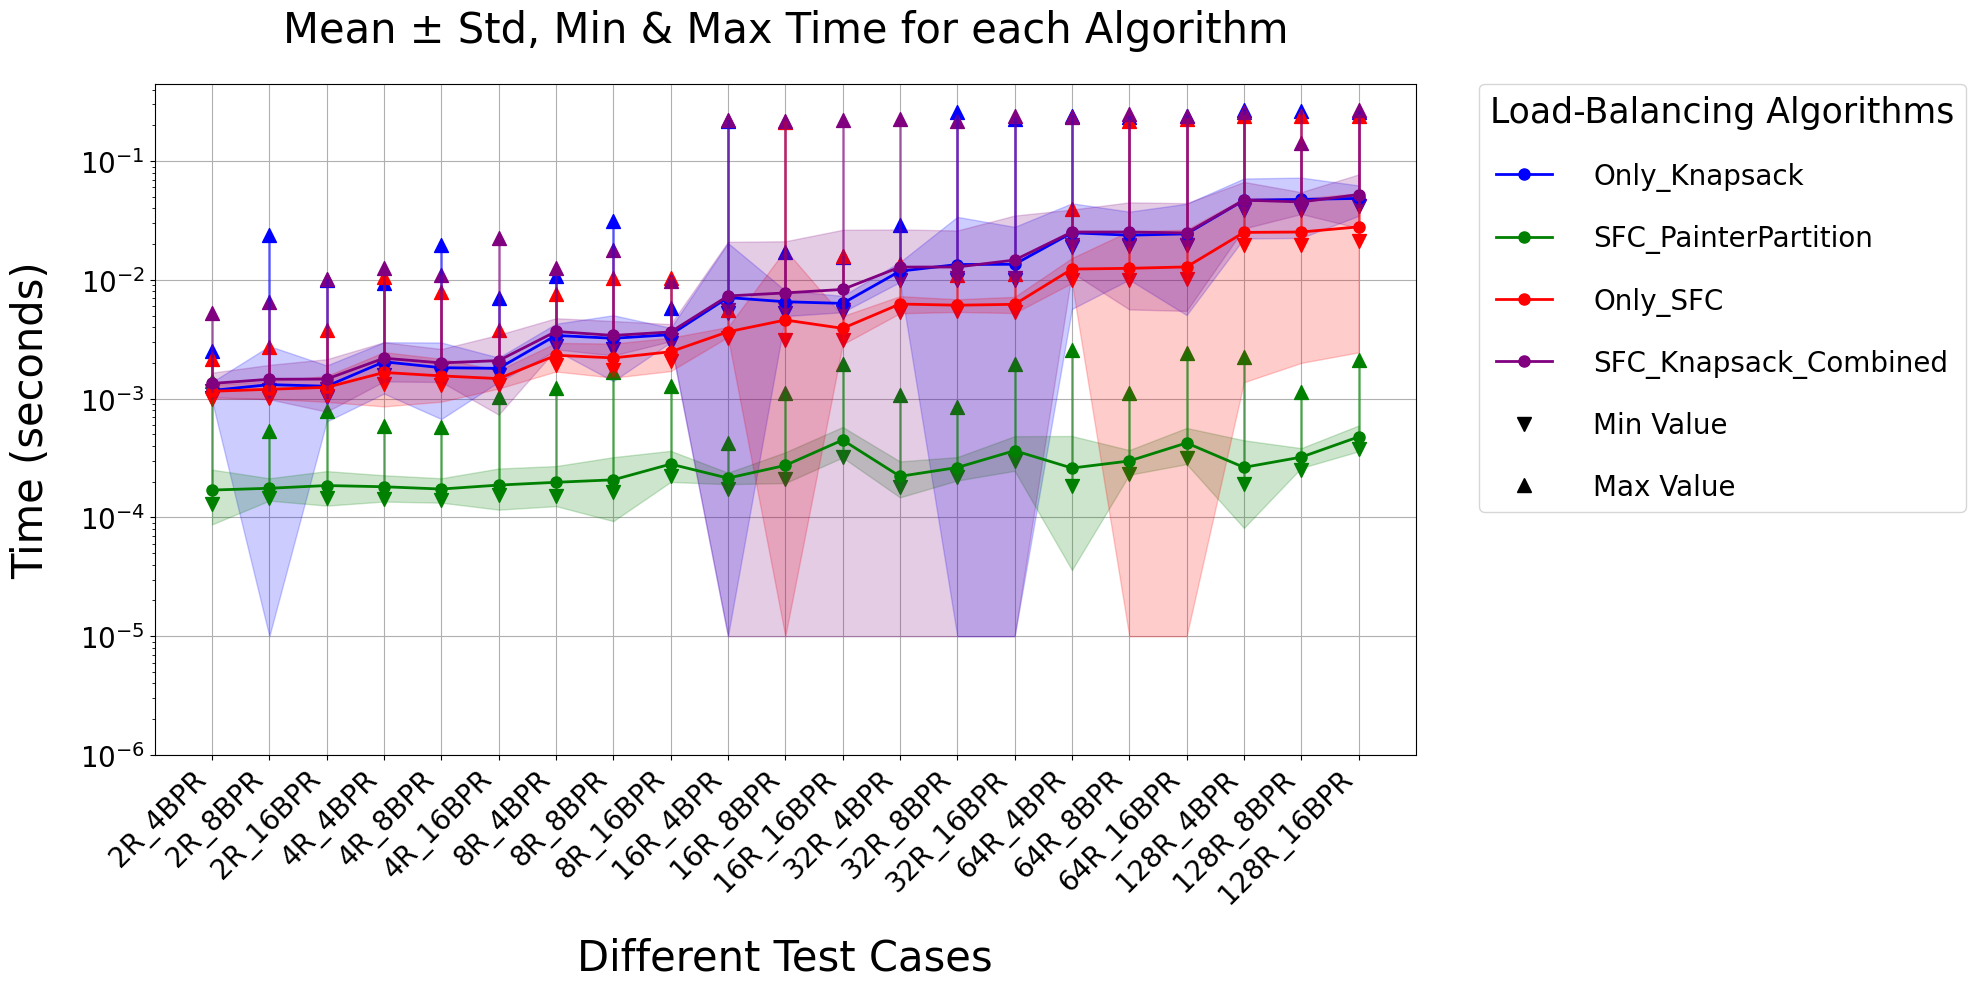

In [33]:

time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(time):
    alg_name = alg  

    mean_col = f'{alg_name}_Final_Time_mean'
    std_col = f'{alg_name}_Final_Time_std'
    min_col = f'{alg_name}_Final_Time_min'
    max_col = f'{alg_name}_Final_Time_max'

    alg_color = colors[i]
    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    lower_bound = np.maximum(grouped[mean_col] - grouped[std_col], 1e-5) 
    upper_bound = grouped[mean_col] + grouped[std_col]

    ax.fill_between(
        x,
        lower_bound,
        upper_bound,
        color=alg_color,
        alpha=0.2
    )
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]
        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)
        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)
        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)

ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30, labelpad=20)
ax.set_ylabel('Time (seconds)', fontsize=30, labelpad=20)
ax.set_title('Mean ± Std, Min & Max Time for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_yscale('log')
ax.set_ylim(1e-6, 0)  

min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=25, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/result_worst/time_all_stats.png', dpi=600)
plt.show()




/tmp/ipykernel_844138/1307027174.py:35: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(1e-5, 0)


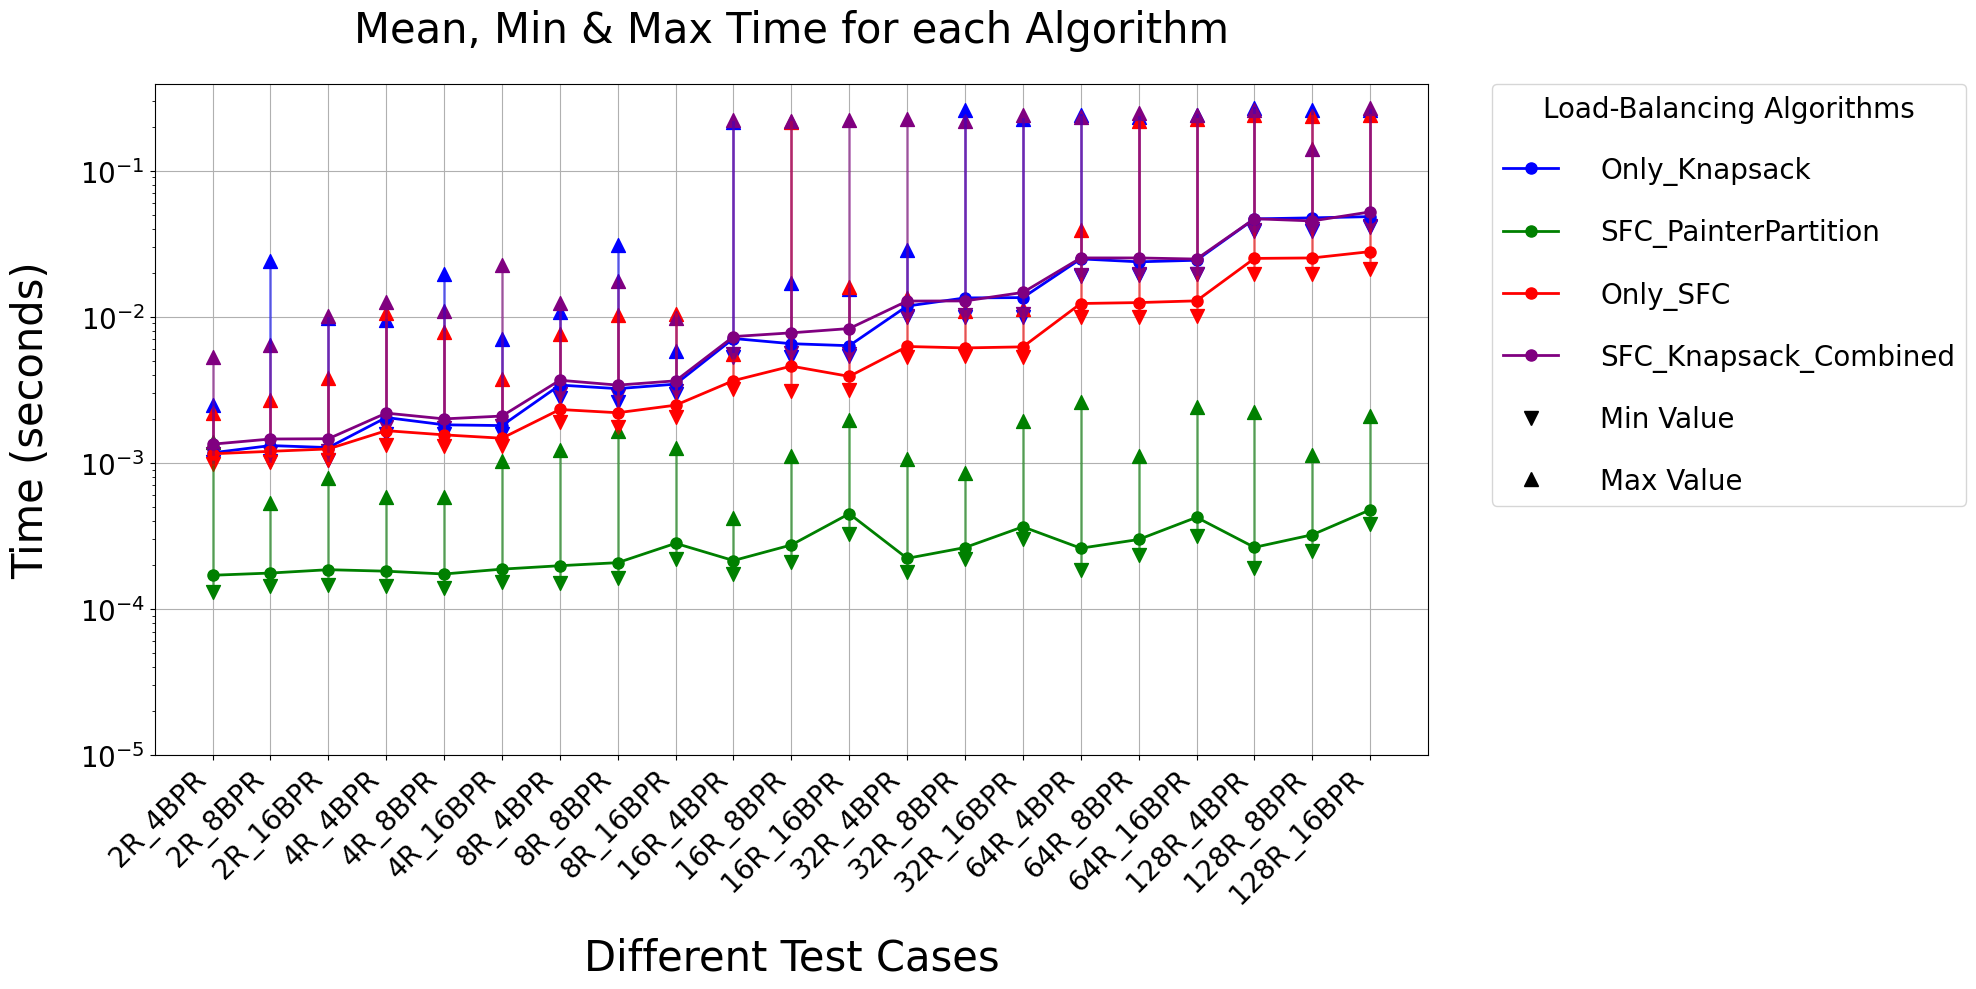

In [34]:
time = ['Only_Knapsack', 'SFC_PainterPartition', 'Only_SFC', 'SFC_Knapsack_Combined']
colors = ['blue', 'green', 'red', 'purple']

fig, ax = plt.subplots(figsize=(20, 10))

for i, alg in enumerate(time):
    alg_name = alg  

    mean_col = f'{alg_name}_Final_Time_mean'
    min_col = f'{alg_name}_Final_Time_min'
    max_col = f'{alg_name}_Final_Time_max'

    alg_color = colors[i]

    ax.plot(x, grouped[mean_col], marker='o', color=alg_color, label=alg_name, linewidth=2, markersize=8)
    for j, file_name in enumerate(grouped['File']):
        min_val = grouped[min_col].iloc[j]
        max_val = grouped[max_col].iloc[j]

        ax.plot([x[j], x[j]], [min_val, max_val], color=alg_color, alpha=0.5, linewidth=2)

        ax.scatter(x[j], min_val, color=alg_color, marker='v', s=100)

        ax.scatter(x[j], max_val, color=alg_color, marker='^', s=100)


ax.set_xticks(x)
ax.set_xticklabels(grouped['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)', fontsize=30,  labelpad=20)
ax.set_title('Mean, Min & Max Time for each Algorithm', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.set_yscale('log')
ax.set_ylim(1e-5, 0)  


min_marker = mlines.Line2D([], [], color='black', marker='v', linestyle='None', markersize=10, label='Min Value')
max_marker = mlines.Line2D([], [], color='black', marker='^', linestyle='None', markersize=10, label='Max Value')

handles, labels = ax.get_legend_handles_labels()
handles += [min_marker, max_marker]
labels += ['Min Value', 'Max Value']

ax.legend(handles, labels, title='Load-Balancing Algorithms', title_fontsize=20, fontsize=20,
          bbox_to_anchor=(1.05, 1), loc='upper left',  borderaxespad=0., labelspacing=1.2, handletextpad=1.5)
ax.grid(True)
ax.set_axisbelow(True)

plt.tight_layout()
plt.savefig('./result/result_worst/time_all_stats_2.png', dpi=600)
plt.show()




In [35]:
grouped

,File,Only_Knapsack_Efficiency_mean,Only_Knapsack_Efficiency_std,Only_Knapsack_Efficiency_min,Only_Knapsack_Efficiency_max,SFC_PainterPartition_Efficiency_mean,SFC_PainterPartition_Efficiency_std,SFC_PainterPartition_Efficiency_min,SFC_PainterPartition_Efficiency_max,Only_SFC_Efficiency_mean,Only_SFC_Efficiency_std,Only_SFC_Efficiency_min,Only_SFC_Efficiency_max,SFC_Knapsack_Combined_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_std,SFC_Knapsack_Combined_Efficiency_min,SFC_Knapsack_Combined_Efficiency_max,Only_Knapsack_Final_Time_mean,Only_Knapsack_Final_Time_std,Only_Knapsack_Final_Time_min,Only_Knapsack_Final_Time_max,SFC_PainterPartition_Final_Time_mean,SFC_PainterPartition_Final_Time_std,SFC_PainterPartition_Final_Time_min,SFC_PainterPartition_Final_Time_max,Only_SFC_Final_Time_mean,Only_SFC_Final_Time_std,Only_SFC_Final_Time_min,Only_SFC_Final_Time_max,SFC_Knapsack_Combined_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_std,SFC_Knapsack_Combined_Final_Time_min,SFC_Knapsack_Combined_Final_Time_max
0,2R_4BPR,0.985356,0.013305,0.918592,0.999878,0.944241,0.035726,0.850322,0.999691,0.895575,0.068078,0.751518,0.999164,0.706308,0.079210,0.512289,0.891981,0.001172,0.000209,0.001009,0.002510,0.000170,0.000083,0.000131,0.001395,0.001154,0.000154,0.000986,0.002178,0.001343,0.000313,0.001156,0.005282
1,2R_8BPR,0.993961,0.006007,0.966353,0.999938,0.967878,0.019910,0.914773,0.999988,0.939158,0.035894,0.841656,0.999988,0.873026,0.044198,0.751628,0.981340,0.001313,0.001459,0.001029,0.023923,0.000176,0.000038,0.000145,0.000531,0.001200,0.000202,0.001018,0.002700,0.001456,0.000468,0.001173,0.006451
2,2R_16BPR,0.997162,0.002871,0.980254,0.999979,0.984149,0.010803,0.950642,0.999985,0.967933,0.019825,0.919033,0.999293,0.921251,0.037031,0.835001,0.990955,0.001273,0.000631,0.001040,0.009884,0.000186,0.000060,0.000145,0.000794,0.001246,0.000306,0.001046,0.003783,0.001463,0.000686,0.001211,0.010148
3,4R_4BPR,0.979252,0.012742,0.926739,0.998268,0.910214,0.029636,0.841394,0.975185,0.864729,0.048100,0.705063,0.967862,0.667151,0.057948,0.524775,0.845621,0.002044,0.000940,0.001588,0.009496,0.000181,0.000045,0.000144,0.000583,0.001661,0.000801,0.001331,0.010574,0.002191,0.000794,0.001765,0.012586
4,4R_8BPR,0.990736,0.005819,0.970898,0.999140,0.951124,0.018439,0.896997,0.994904,0.920818,0.030259,0.852253,0.994904,0.847850,0.038521,0.725937,0.935036,0.001822,0.001149,0.001571,0.019627,0.000173,0.000040,0.000140,0.000580,0.001555,0.000612,0.001304,0.007836,0.002000,0.000619,0.001746,0.010938
5,4R_16BPR,0.995809,0.002482,0.987458,0.999651,0.976340,0.009014,0.955682,0.997245,0.958065,0.016160,0.919969,0.997245,0.905001,0.027510,0.833680,0.961044,0.001800,0.000417,0.001580,0.007043,0.000187,0.000071,0.000154,0.001038,0.001475,0.000259,0.001296,0.003750,0.002092,0.001359,0.001778,0.022576
6,8R_4BPR,0.989703,0.004520,0.971434,0.997724,0.944332,0.012630,0.909407,0.976841,0.914523,0.022198,0.857459,0.965023,0.832648,0.032172,0.706206,0.905189,0.003409,0.000864,0.002802,0.010808,0.000198,0.000073,0.000151,0.001223,0.002320,0.000627,0.001908,0.007642,0.003679,0.001077,0.002976,0.012529
7,8R_8BPR,0.995328,0.002008,0.988915,0.999180,0.971262,0.006928,0.949469,0.987138,0.955506,0.012617,0.914469,0.985510,0.896187,0.020146,0.847948,0.944026,0.003222,0.001818,0.002613,0.031256,0.000207,0.000114,0.000163,0.001663,0.002204,0.000702,0.001751,0.010307,0.003406,0.001097,0.002872,0.017701
8,8R_16BPR,0.997911,0.000840,0.995299,0.999497,0.985854,0.003339,0.977160,0.994354,0.976516,0.006697,0.953723,0.991848,0.945765,0.010603,0.914950,0.973144,0.003460,0.000483,0.002957,0.005820,0.000281,0.000082,0.000221,0.001274,0.002484,0.000777,0.002060,0.010455,0.003645,0.000601,0.003100,0.009820
9,16R_4BPR,0.988797,0.003754,0.976774,0.997552,0.942094,0.009292,0.907501,0.968896,0.906831,0.020117,0.852326,0.949177,0.820756,0.027508,0.709683,0.878570,0.007104,0.013332,0.005297,0.216647,0.000214,0.000024,0.000175,0.000419,0.003656,0.000353,0.003213,0.005541,0.007324,0.013595,0.005535,0.2

In [36]:
columns_to_keep = ['File','Only_Knapsack_Efficiency_mean', 'Only_SFC_Efficiency_mean', 'SFC_PainterPartition_Efficiency_mean', 'SFC_Knapsack_Combined_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'Only_SFC_Final_Time_mean', 'SFC_PainterPartition_Final_Time_mean', 'SFC_Knapsack_Combined_Final_Time_mean' ]
new_df = grouped[columns_to_keep]


In [37]:
new_df

,File,Only_Knapsack_Efficiency_mean,Only_SFC_Efficiency_mean,SFC_PainterPartition_Efficiency_mean,SFC_Knapsack_Combined_Efficiency_mean,Only_Knapsack_Final_Time_mean,Only_SFC_Final_Time_mean,SFC_PainterPartition_Final_Time_mean,SFC_Knapsack_Combined_Final_Time_mean
0,2R_4BPR,0.985356,0.895575,0.944241,0.706308,0.001172,0.001154,0.000170,0.001343
1,2R_8BPR,0.993961,0.939158,0.967878,0.873026,0.001313,0.001200,0.000176,0.001456
2,2R_16BPR,0.997162,0.967933,0.984149,0.921251,0.001273,0.001246,0.000186,0.001463
3,4R_4BPR,0.979252,0.864729,0.910214,0.667151,0.002044,0.001661,0.000181,0.002191
4,4R_8BPR,0.990736,0.920818,0.951124,0.847850,0.001822,0.001555,0.000173,0.002000
5,4R_16BPR,0.995809,0.958065,0.976340,0.905001,0.001800,0.001475,0.000187,0.002092
6,8R_4BPR,0.989703,0.914523,0.944332,0.832648,0.003409,0.002320,0.000198,0.003679
7,8R_8BPR,0.995328,0.955506,0.971262,0.896187,0.003222,0.002204,0.000207,0.003406
8,8R_16BPR,0.997911,0.976516,0.985854,0.945765,0.003460,0.002484,0.000281,0.003645
9,16R_4BPR,0.988797,0.906831,0.942094,0.820756,0.007104,0.003656,0.000214,0.007324


In [38]:
# algorithms = [
#     ('Only_Knapsack', 'Only_Knapsack_Efficiency', 'Only_Knapsack_Final_Time'),
#     ('Only_SFC', 'Only_SFC_Efficiency', 'Only_SFC_Final_Time'),
#     ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency', 'SFC_PainterPartition_Final_Time'),
#     ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency', 'SFC_Knapsack_Combined_Final_Time')
# ]

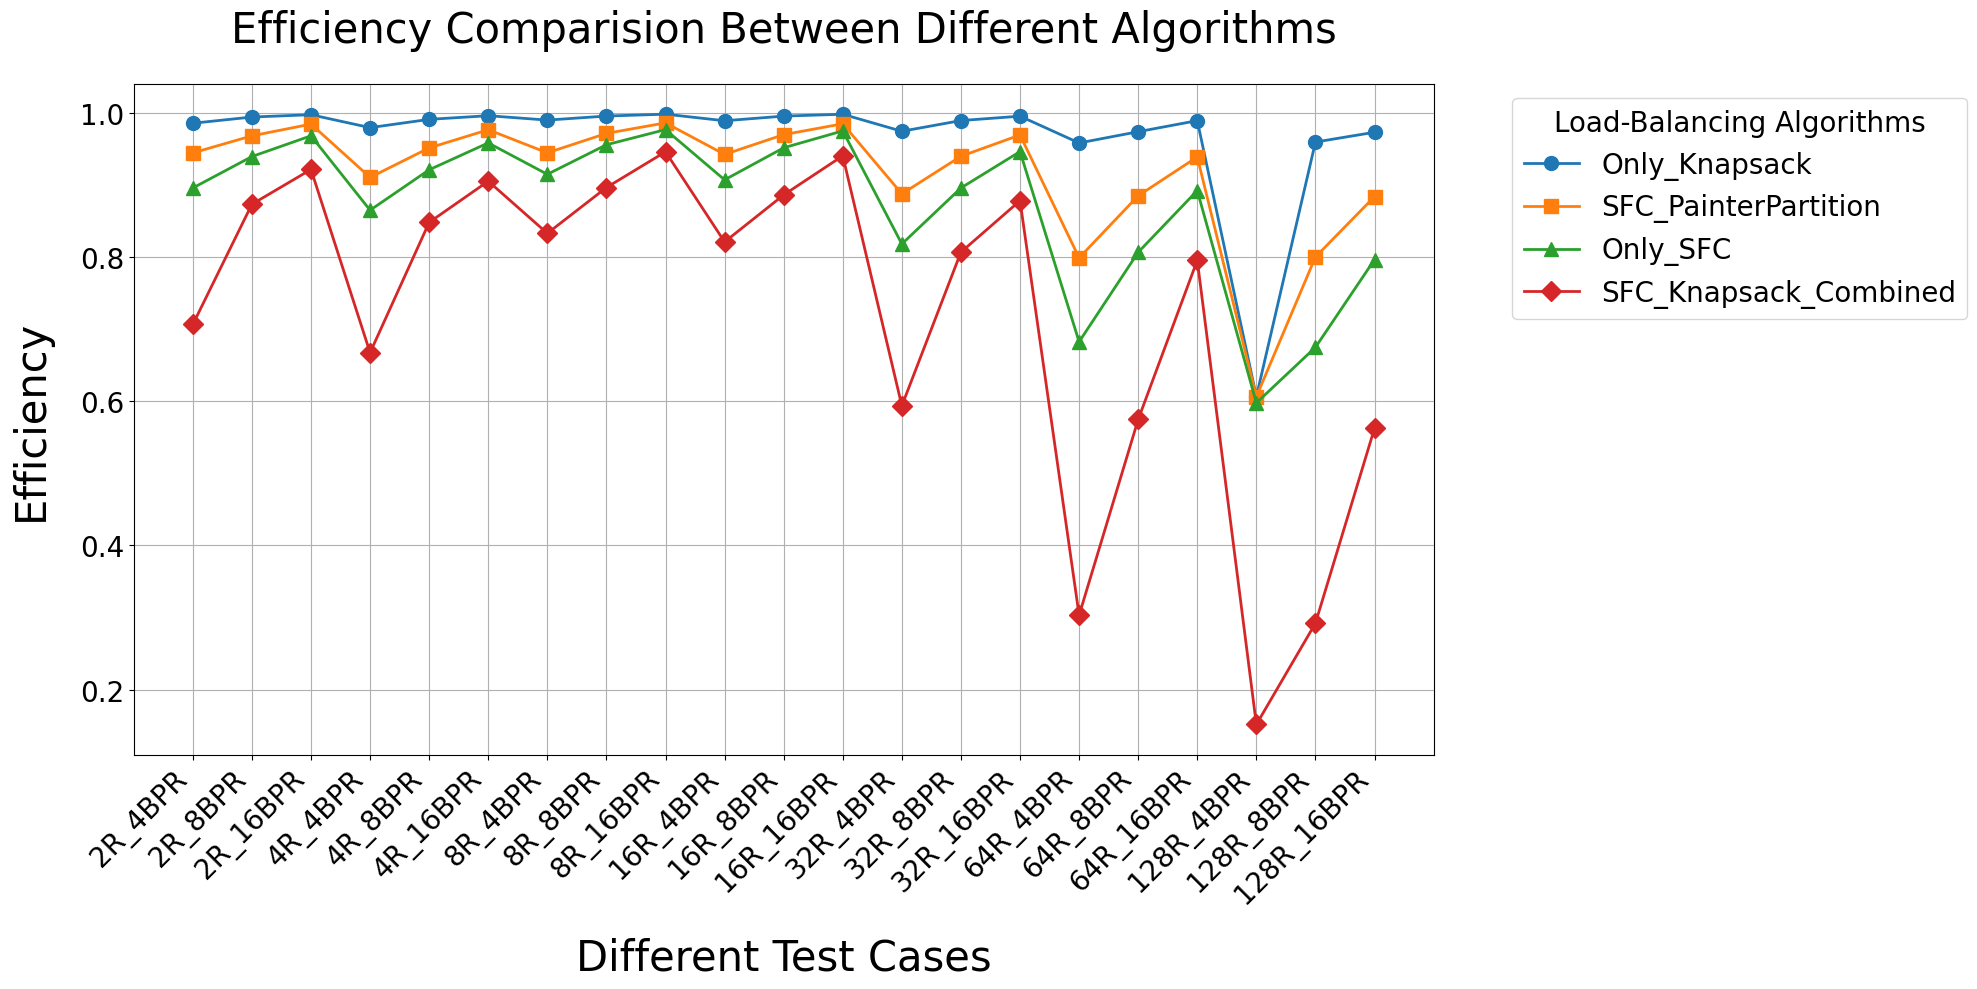

In [39]:
algorithms = [
    ('Only_Knapsack', 'Only_Knapsack_Efficiency_mean', 'Only_Knapsack_Final_Time_mean', 'o'),
    ('SFC_PainterPartition', 'SFC_PainterPartition_Efficiency_mean', 'SFC_PainterPartition_Final_Time_mean', 's'),
    ('Only_SFC', 'Only_SFC_Efficiency_mean', 'Only_SFC_Final_Time_mean', '^'),
    ('SFC_Knapsack_Combined', 'SFC_Knapsack_Combined_Efficiency_mean', 'SFC_Knapsack_Combined_Final_Time_mean', 'D')
]

x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[eff_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Efficiency', fontsize=30,  labelpad=20)
ax.set_title('Efficiency Comparision Between Different Algorithms', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_axisbelow(True)
plt.tight_layout()
plt.savefig('./result/result_worst/efficiency.png', dpi=600)
plt.show()





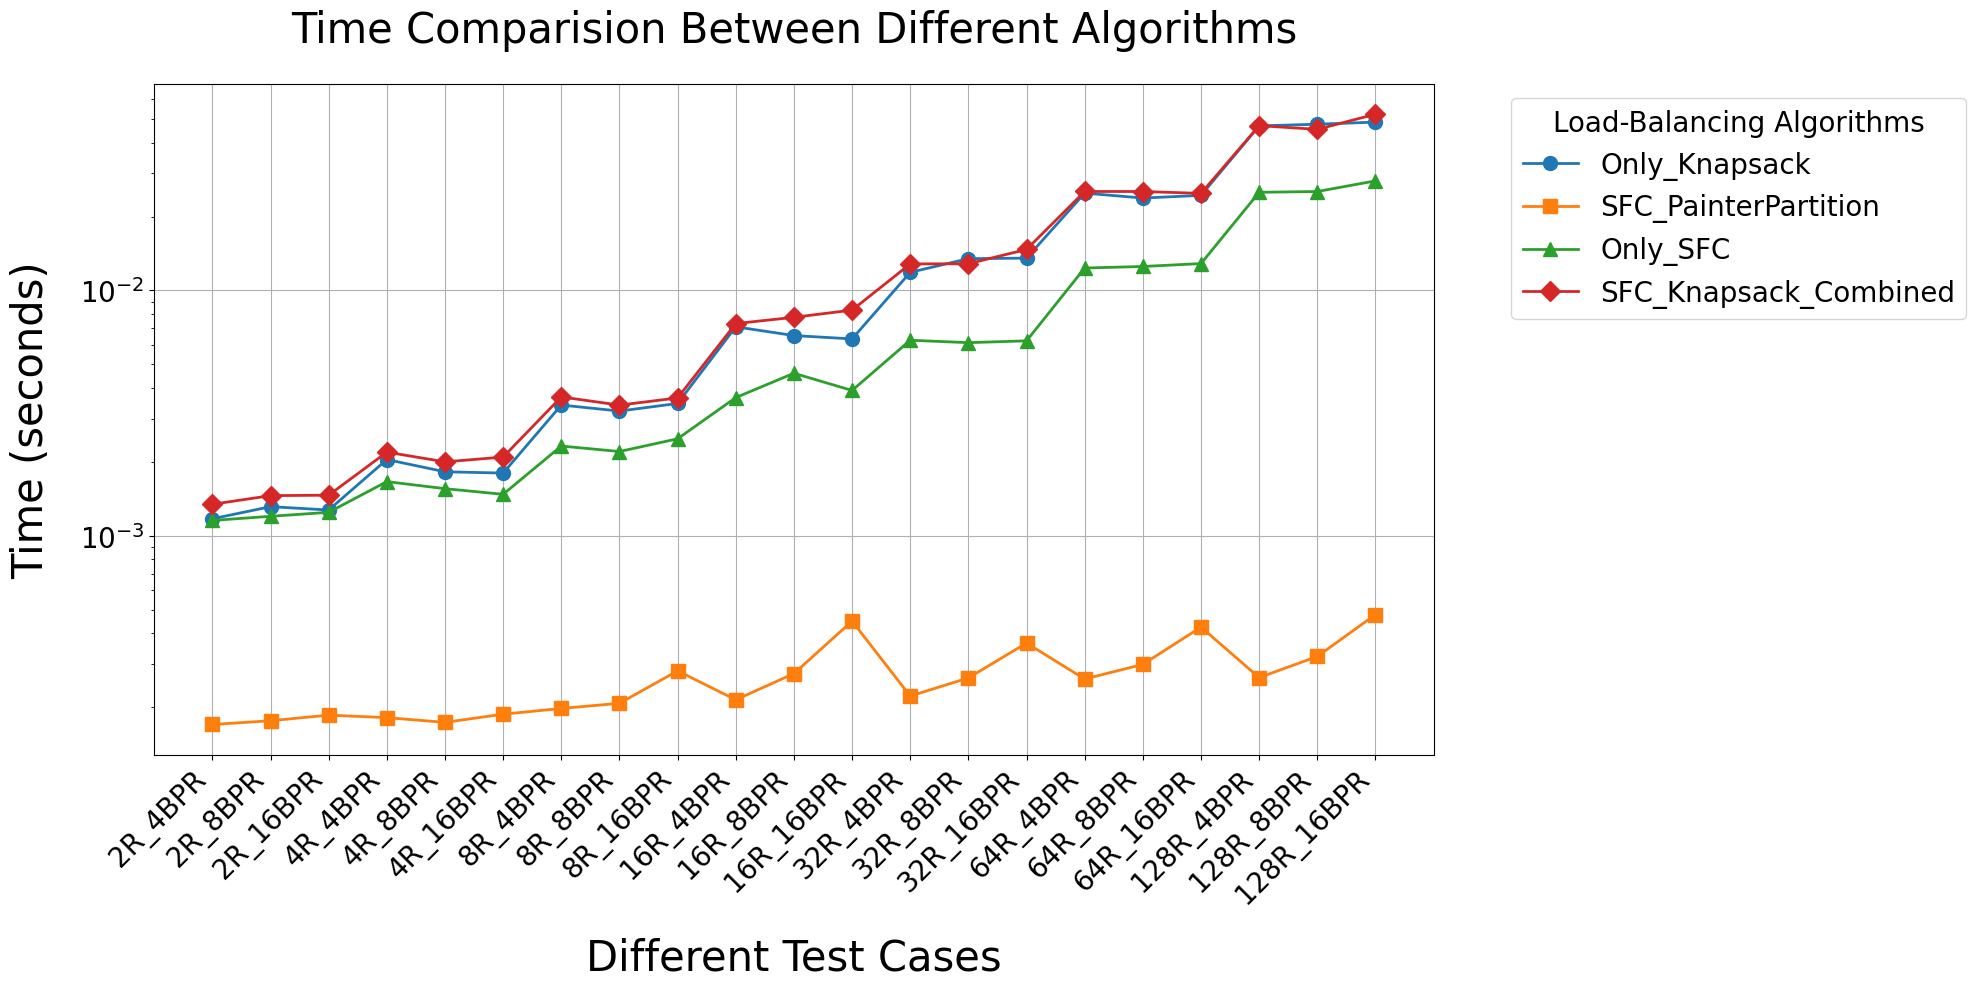

In [40]:
# fig, ax = plt.subplots(figsize=(20, 10))

# for alg_name, eff_col, time_col, marker in algorithms:
#     ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
# ax.set_xticks(x)
# ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
# ax.set_xlabel('File', fontsize=15)
# ax.set_ylabel('Time (seconds)', fontsize=15)
# ax.set_title('Time Means by File and Algorithm', fontsize=20)
# ax.tick_params(axis='both', which='major', labelsize=15)
# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)

# plt.tight_layout()
# plt.show()


x = np.arange(len(new_df['File']))
fig, ax = plt.subplots(figsize=(20, 10))

for alg_name, eff_col, time_col, marker in algorithms:
    ax.plot(x, new_df[time_col], marker=marker, markersize=10, linewidth=2, label=alg_name)
ax.set_xticks(x)
ax.set_xticklabels(new_df['File'], rotation=45, ha='right')
ax.set_xlabel('Different Test Cases', fontsize=30,labelpad=20)
ax.set_ylabel('Time (seconds)',  fontsize=30,  labelpad=20)
ax.set_title('Time Comparision Between Different Algorithms', pad=30, fontsize=30)
ax.tick_params(axis='both', which='major', labelsize=20)

ax.legend(title='Load-Balancing Algorithms', title_fontsize=20, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=20)
ax.grid(True)
ax.set_axisbelow(True)
ax.set_yscale('log')
plt.tight_layout()
plt.savefig('./result/result_worst/time.png', dpi=600)
plt.show()


